# Aviation Accidents Data
This is a Phase 1 Project that involves a csv file on aviation accidents between the year 1948-2022

**Author:** Emma Kahoro 
**Date:** 29/09/2025  
**Purpose:** This notebook performs a detailed analysis of aviation accident data, including accident counts, injuries and relationships with weather and months.


### Data Info
The data is obtained from github as the assigned dataset [AVIATION](https://github.com/learn-co-curriculum/dsc-phase-1-project-v3/blob/master/data/Aviation_Data.csv), which contains data on aviation accidents for different aircrafts and airports.


## Analysis Objectives

1. Identify the most common aircraft makes and models involved in accidents.

2. Analyze accident severity by aircraft characteristics

3. Determine the safest and riskiest aircraft makes

4. Assess the influence of environmental factors on accident outcomes

5. Provide actionable recommendations for stakeholders

---



### 1.1 **Import Libraries** and **Load Dataset**
- Load Python libraries for data manipulation and visualization.
- Load the CSV file containing accident and incident records.

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Read the dataset
df = pd.read_csv("Aviation_Data.csv", low_memory=False)

### 1.2 Inspect the data
Taking a look at the data to get a general sense of what the DataFrame is about.
Inspect the first few rows, check column types, and understand the dataset structure. 

In [3]:
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [4]:
df.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
90343,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
90344,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
90345,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
90346,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
90347,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


In [5]:
print(df.shape)
print(df.columns)

(90348, 31)
Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

#### Summary of the Data
The general description from the df is;
- There are 90348 rows and 31 columns
- Columns have numerical and string data types
- There are missing values in most of the columns with only one column complete
- 4 columns are float datatype
- The data is messy and needs cleaning

### 2.0 **Data Cleaning and Transformation** 
Handle missing data, standardize the data and ensure the data has no duplicates.  

#### 2.1 Handling missing data and Duplicates
Data cleaning for the columns: 'Make' 'Model' 'Aircraft.Category' 'Engine.Type' 'Number.of.Engines' 'Amateur.Built'

In [7]:
# Missing values for the columns of interest
cols = ['Make', 'Model', 'Aircraft.Category', 'Engine.Type', 'Number.of.Engines', 'Amateur.Built']

# Check missing values
df[cols].isna().sum()

Make                  1522
Model                 1551
Aircraft.Category    58061
Engine.Type           8536
Number.of.Engines     7543
Amateur.Built         1561
dtype: int64

In [8]:
# Drop missing values by make and model
df = df.dropna(subset=['Make', 'Model'])

In [9]:
# Standardize the make Column
df['Make'] = df['Make'].str.strip().str.title().replace({'Bell': 'Bellanca', 'Mcdonnell Douglas': 'Douglas'})
# Count the top 20 most frequent aircraft makes
df['Make'].value_counts().head(20)


Cessna            27145
Piper             14869
Beech              5371
Bellanca           3767
Boeing             2738
Mooney             1334
Robinson           1229
Grumman            1172
Hughes              932
Douglas             889
Schweizer           773
Air Tractor         691
Aeronca             636
Maule               589
Champion            519
Stinson             439
Aero Commander      429
De Havilland        421
Luscombe            414
Aerospatiale        388
Name: Make, dtype: int64

In [10]:
#Standardizing Aircraft Category
df['Aircraft.Category'] = df['Aircraft.Category'].str.strip().str.title().replace({'Unk': 'Unknown', 
                                                                                   'Ultr': 'Ultralight',
                                                                                   'Wsft': 'Weight-Shift'})
# Fill missing values for aircraft category with `Unknown` 
df['Aircraft.Category'] = df['Aircraft.Category'].fillna('Unknown')
df['Aircraft.Category'].value_counts()

Unknown              56548
Airplane             27580
Helicopter            3435
Glider                 508
Balloon                231
Gyrocraft              173
Weight-Shift           170
Powered Parachute       91
Ultralight              31
Powered-Lift             5
Blimp                    4
Rocket                   1
Name: Aircraft.Category, dtype: int64

In [11]:
# Standardize the values of the Engine.Type
df['Engine.Type'] = df['Engine.Type'].str.strip().str.title().replace({'Unk': 'Unknown', 'Geared Turbofan': 'Turbo Fan'})
df['Engine.Type'].isna().sum()

# Fill the missing values with the mode
engine_type_mode = df['Engine.Type'].mode()[0]
df['Engine.Type'] = df['Engine.Type'].fillna(engine_type_mode)
df['Engine.Type'].value_counts()


Reciprocating    76502
Turbo Shaft       3609
Turbo Prop        3390
Turbo Fan         2490
Unknown           2049
Turbo Jet          703
None                21
Electric            10
Lr                   2
Hybrid Rocket        1
Name: Engine.Type, dtype: int64

In [12]:
# Run the descriptive statistics 
df['Number.of.Engines'].describe()

# Fill missing with median (since it’s numeric and usually 1).
df['Number.of.Engines'] = df['Number.of.Engines'].fillna(df['Number.of.Engines'].median())

In [13]:
# Whether the aircraft is amateur-built replace missing with `Unknown`
df['Amateur.Built'] = df['Amateur.Built'].fillna('Unknown')
df['Amateur.Built'].value_counts()

No         80240
Yes         8438
Unknown       99
Name: Amateur.Built, dtype: int64

In [14]:
# Ensure the columns have no missung data
df[cols].isna().sum()

Make                 0
Model                0
Aircraft.Category    0
Engine.Type          0
Number.of.Engines    0
Amateur.Built        0
dtype: int64

In [15]:
df.shape

(88777, 31)

In [16]:
# Check for duplicates
duplicates = df.duplicated()

# Count duplicates
print("Number of duplicate rows:", duplicates.sum())


Number of duplicate rows: 0


#### 2.2 Cleaning the Weather Condition Column
- Replace all missing values with unknown to show whether unknown has a significance in accidents

In [17]:
df['Weather.Condition'].value_counts()

# There is UNK and Unk both for unknown
# make the categories case sensitive
df['Weather.Condition'] = df['Weather.Condition'].str.strip().str.upper()

df['Weather.Condition'].isnull().sum()

# Replace the missing values(4492) with UNK for Unknown
df['Weather.Condition'].fillna('UNK', inplace=True)
df['Weather.Condition'].value_counts()

VMC    77251
IMC     5971
UNK     5555
Name: Weather.Condition, dtype: int64

#### 2.3 Changing the Event.Date column to date-time datatype
- Change the datatype
- Create a new column of seasons

In [18]:
# Convert the columm data type do date.time 
df['Event.Date'] = pd.to_datetime(df['Event.Date'])

print(df['Event.Date'].dtype)

# Extract Year and Month(Abbreviation) and observe if they correspond correctly
df['Year'] = df['Event.Date'].dt.year
df['Month'] = df['Event.Date'].dt.strftime('%b')

df[['Year', 'Month']].head()


datetime64[ns]


,Year,Month
0,1948,Oct
1,1962,Jul
2,1974,Aug
3,1977,Jun
4,1979,Aug


In [19]:
# Create a new column of seasons
def get_season(Month):
    if Month in ['Dec', 'Jan', 'Feb']:
        return 'Winter'
    elif Month in ['Mar', 'Apr', 'May']:
        return 'Spring'
    elif Month in ['Jun', 'Jul', 'Aug']:
        return 'Summer'
    else:
        return 'Fall'

# Create season column
df['Season'] = df['Month'].apply(get_season)


#### 2.4 Clean the Location Column and the Country Column
- Drop rows where both Country and Location are missing
- Ensure the the row items are case sensitive to remove duplicates
- Replace rows with missing Location and Country to `Unknown`

In [20]:
# Count rows where both Country and Location are missing
missing_both = df[df['Country'].isnull() & df['Location'].isnull()]
print("Number of rows missing both Country and Location:", missing_both.shape[0])

# Drop rows where BOTH Country and Location are missing(1 Row)
df = df.dropna(subset=['Country', 'Location'], how='all')


Number of rows missing both Country and Location: 1


In [21]:
# Cleaning the Location Column
df['Location'].value_counts()

# Strip extra spaces and standardize to Title
df['Location'] = df['Location'].str.title().str.strip()

# Rename the missing location as `Unknown`
df['Location'].fillna('Unknown', inplace=True)

df['Location'].isna().sum() # Check for missing data

# Separate the known from the unknown locations
df_known_location = df[df["Location"] != "Unknown"]

df['Location'].isna().sum()

0

In [22]:
# Cleaning the Country Column
df['Country'].value_counts(dropna=False).head(20)

# Strip extra spaces and standardize capitalization 
df['Country'] = df['Country'].str.strip().str.title()

# # Fill missing country values with 'Unknown'
df['Country'].fillna('Unknown', inplace=True)

df['Country'].isna().sum() # Check for missing values

# # Separate the known from the unknown Country
df_known_country = df[df["Country"] != "Unknown"]
df['Country'].isna().sum()

0

#### 2.6 Data Cleaning of the Numerical Columns
Columns of interest are; `Total.Fatal.Injuries`, `Total.Serious.Injuries`, `Total.Minor.Injuries`, `Total.Uninjured`
- Drop the rows with missing values in all the columns of interest
- Ensure that all the values are numeric in nature
- Fill the missing values with 0(which is the median and the approximate mean)
- Ensure that there are no negative injuries

In [23]:
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Year
count,88776.000000,77390.000000,76286.000000,76862.000000,82879.000000,88776.000000
mean,1.136647,0.647538,0.279815,0.357199,5.321698,1999.202746
std,0.432727,5.488763,1.544410,2.236775,27.913736,11.888544
min,0.000000,0.000000,0.000000,0.000000,0.000000,1948.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,1989.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000,1998.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000,2009.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000,2022.000000


In [24]:
# Count rows where 
missing_all = df[df['Total.Fatal.Injuries'].isnull() & 
                 df['Total.Serious.Injuries'].isnull() & 
                 df['Total.Minor.Injuries'].isnull() & 
                 df['Total.Uninjured'].isnull()]

print("Number of rows missing all injuries(Fatal,Serious,Minor,Uninjured):", missing_all.shape[0])

# Drop rows where all Injuries and Uninjured are missing(223 Rows)
df = df.dropna(subset=['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured'], how='all')


Number of rows missing all injuries(Fatal,Serious,Minor,Uninjured): 219


In [25]:
# # A list of the columns of interest
numeric_cols = ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']

# #  Convert to numeric (invalid entries become NaN)
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col])

# # Fill missing values with 0 (The Median and Approximate Mean)
df[numeric_cols] = df[numeric_cols].fillna(0)

# # Check for negative values in the columns
for col in numeric_cols:
    neg_count = (df[col] < 0).sum()
print(f"Number of rows with negative values: {neg_count}")

Number of rows with negative values: 0


In [26]:
# Check data type and missing data for all variables of interest
df[[
    'Make', 'Model', 'Aircraft.Category', 'Engine.Type', 'Number.of.Engines', 'Amateur.Built','Country', 'Location', 'Weather.Condition', 'Event.Date',
    'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured', 'Season'
    ]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88557 entries, 0 to 90347
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Make                    88557 non-null  object        
 1   Model                   88557 non-null  object        
 2   Aircraft.Category       88557 non-null  object        
 3   Engine.Type             88557 non-null  object        
 4   Number.of.Engines       88557 non-null  float64       
 5   Amateur.Built           88557 non-null  object        
 6   Country                 88557 non-null  object        
 7   Location                88557 non-null  object        
 8   Weather.Condition       88557 non-null  object        
 9   Event.Date              88557 non-null  datetime64[ns]
 10  Total.Fatal.Injuries    88557 non-null  float64       
 11  Total.Serious.Injuries  88557 non-null  float64       
 12  Total.Minor.Injuries    88557 non-null  float6

In [27]:
# Create a column for fatal injuries 0 for fatal and 1 for non fatal
df['Is_Fatal'] = (df['Total.Fatal.Injuries'] > 0).astype(int)

### 3.0 **Data Manipulation, Analysis and Visualization**


#### 3.1. Identify the most common aircraft involved in accidents.
To understand which make of aircraft appear most frequently in accident reports.
This is the aircraft that is more prone to accidents.

In [28]:
# Variable containing the top 10 makes 
top_10_makes = df['Make'].value_counts().head(10)
top_10_makes

Cessna      27135
Piper       14860
Beech        5362
Bellanca     3755
Boeing       2627
Mooney       1334
Robinson     1227
Grumman      1172
Hughes        931
Douglas       865
Name: Make, dtype: int64

In [29]:
# Select the injury columns and group them by make
injury_cols = ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']

make_injuries = (df.groupby('Make')[injury_cols].sum().reset_index())

# Add total injuries column
make_injuries['Total_Injuries'] = (make_injuries['Total.Fatal.Injuries'] +
                                   make_injuries['Total.Serious.Injuries'] +
                                   make_injuries['Total.Minor.Injuries'])

# Sort by total injuries and keep top 20
top10_makes = (make_injuries.sort_values('Total_Injuries', ascending=False).head(10))
top10_makes


,Make,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Total_Injuries
1256,Cessna,9637.0,4894.0,6875.0,34418.0,21406.0
825,Boeing,8748.0,2157.0,2761.0,208368.0,13666.0
5266,Piper,6688.0,3059.0,3757.0,17832.0,13504.0
637,Beech,3781.0,1095.0,1340.0,7891.0,6216.0
1955,Douglas,2270.0,661.0,1752.0,53907.0,4683.0
686,Bellanca,1677.0,1074.0,1361.0,4002.0,4112.0
181,Airbus Industrie,1174.0,138.0,399.0,21261.0,1711.0
175,Airbus,1325.0,192.0,106.0,21261.0,1623.0
4743,Mooney,685.0,248.0,391.0,1303.0,1324.0
5751,Robinson,618.0,219.0,320.0,1132.0,1157.0


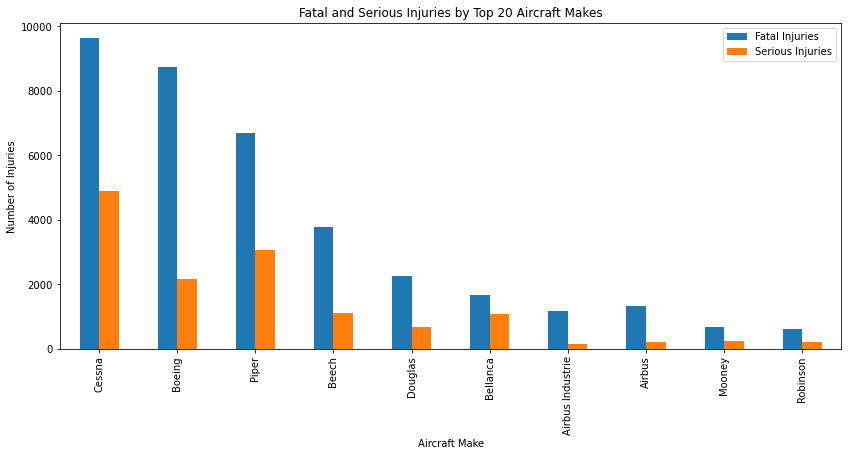

In [30]:
# Select only fatal + serious injuries for top 20 makes
plot_cols = ['Total.Fatal.Injuries', 'Total.Serious.Injuries']

top10_makes.set_index('Make')[plot_cols].plot(kind='bar',figsize=(14,6))

plt.title("Fatal and Serious Injuries by Top 20 Aircraft Makes")
plt.ylabel("Number of Injuries")
plt.xlabel("Aircraft Make")
plt.legend(["Fatal Injuries", "Serious Injuries"])
plt.show()

Cessna is the model most occuring for all the incidents as well as injuries.
Piper is second most occuring for all injuries and Serious Injuries.
Boeing is second most occuring for fatal injuries.

#### 3.2 Analyze accident distribution by aircraft characteristics
Analyze by:
- Aircraft Category
- Engine Type
- Number of Engines
- Amateur Built

##### AIRCRAFT CATEGORY

In [31]:
# Count events by aircraft category
events_by_category = (df.groupby('Aircraft.Category')['Event.Id'].count().reset_index(name='Event_Count')
                     .sort_values(by='Event_Count', ascending=False))

print(events_by_category)

    Aircraft.Category  Event_Count
10            Unknown        56393
0            Airplane        27519
5          Helicopter         3432
3              Glider          508
1             Balloon          231
4           Gyrocraft          173
11       Weight-Shift          170
6   Powered Parachute           91
9          Ultralight           31
2               Blimp            4
7        Powered-Lift            4
8              Rocket            1


In [32]:
# Group the aircraft category by the injury columns
category_injuries = (
    df.groupby('Aircraft.Category')[injury_cols].sum().reset_index().sort_values(by='Total.Fatal.Injuries', ascending=False))
category_injuries


,Aircraft.Category,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
10,Unknown,32036.0,12588.0,19819.0,265749.0
0,Airplane,16014.0,7254.0,6279.0,170085.0
5,Helicopter,1774.0,1039.0,892.0,3873.0
3,Glider,99.0,113.0,112.0,337.0
11,Weight-Shift,77.0,59.0,52.0,48.0
4,Gyrocraft,44.0,55.0,30.0,84.0
1,Balloon,43.0,186.0,185.0,842.0
6,Powered Parachute,15.0,40.0,73.0,23.0
9,Ultralight,10.0,11.0,9.0,10.0
8,Rocket,1.0,0.0,1.0,0.0


- Airplanes have the highest number of events occurence, also for all injuries.
- Rockets have the lowest number of event occurence.
- Powered Lift has the lowest number of Injuries recorded.

##### ENGINE TYPE

     Engine.Type  Event_Count
4  Reciprocating        76371
8    Turbo Shaft         3608
7     Turbo Prop         3388
5      Turbo Fan         2477
9        Unknown         1976
6      Turbo Jet          703
3           None           21
0       Electric           10
2             Lr            2
1  Hybrid Rocket            1


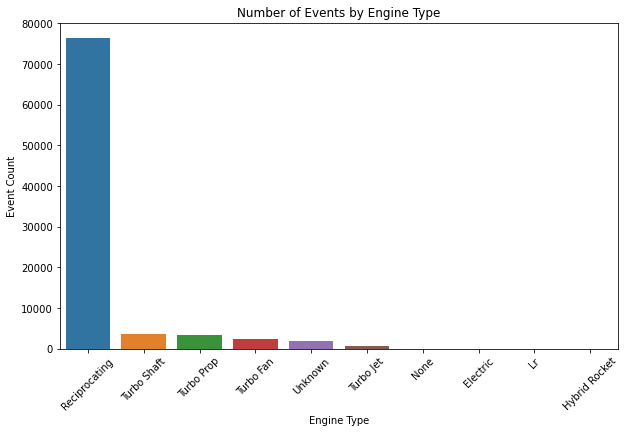

In [33]:
# Count events by engine type
events_by_engine_type = (df.groupby('Engine.Type')['Event.Id'].count().reset_index(name='Event_Count')
                     .sort_values(by='Event_Count', ascending=False))

print(events_by_engine_type)


# Plot
plt.figure(figsize=(10,6))
sns.barplot(x="Engine.Type",y="Event_Count",data=events_by_engine_type)

plt.title("Number of Events by Engine Type")
plt.xlabel("Engine Type")
plt.ylabel("Event Count")
plt.xticks(rotation=45)
plt.show()

In [34]:
# Counts of engine type by injuries
fatalities_by_engine = (
    df.groupby("Engine.Type")[injury_cols]
      .sum()
      .reset_index()
      .sort_values(by="Total.Fatal.Injuries", ascending=False)
)
print(fatalities_by_engine)



     Engine.Type  Total.Fatal.Injuries  Total.Serious.Injuries  \
4  Reciprocating               36661.0                 16201.0   
5      Turbo Fan                4560.0                  1848.0   
9        Unknown                3765.0                  1133.0   
7     Turbo Prop                2566.0                   677.0   
8    Turbo Shaft                1695.0                  1217.0   
6      Turbo Jet                 862.0                   236.0   
0       Electric                   2.0                     1.0   
1  Hybrid Rocket                   1.0                     0.0   
3           None                   1.0                    12.0   
2             Lr                   0.0                    21.0   

   Total.Minor.Injuries  Total.Uninjured  
4               19477.0         161227.0  
5                3385.0         211161.0  
9                1751.0          12794.0  
7                 902.0          16835.0  
8                1563.0           4858.0  
6              

- Reciprocating Engines are the most prone to having accidents and incidents as well as injuries.
- Hybrid rocket has the least occuring incidents and the least serious injuries(0).
- LR has the least recorded fatal injuries(0).

##### NUMBER OF ENGINES

In [35]:
# Event occurence by number of engines
accidents_by_engine_count = (df.groupby('Number.of.Engines').size().sort_values(ascending=False))

print(accidents_by_engine_count)


Number.of.Engines
1.0    75387
2.0    11063
0.0     1194
3.0      482
4.0      427
8.0        3
6.0        1
dtype: int64


In [36]:
# Counts of Number of engines by injuries
injury_cols = ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 
               'Total.Minor.Injuries', 'Total.Uninjured']

injuries_by_engine_count = (df.groupby('Number.of.Engines')[injury_cols].sum().sort_values(by='Total.Fatal.Injuries', ascending=False))

print(injuries_by_engine_count)


                   Total.Fatal.Injuries  Total.Serious.Injuries  \
Number.of.Engines                                                 
1.0                             36642.0                 16894.0   
2.0                             10518.0                  3417.0   
4.0                              1666.0                   231.0   
3.0                               878.0                   333.0   
0.0                               409.0                   450.0   
6.0                                 0.0                     0.0   
8.0                                 0.0                    21.0   

                   Total.Minor.Injuries  Total.Uninjured  
Number.of.Engines                                         
1.0                             20752.0         149833.0  
2.0                              4531.0         195772.0  
4.0                               509.0          40927.0  
3.0                              1174.0          51396.0  
0.0                               486.0   

- Aircrafts with 1 engine have the highest number of events and injuries.
- Aircrafts with 6 engines have the least number of events and injuries.

##### AMATEUR BUILT

In [37]:
# Count events by Amateur Built status
events_by_amateur = (df.groupby('Amateur.Built')['Event.Id'].count().reset_index(name='Event_Count')
                     .sort_values(by='Event_Count', ascending=False))

print(events_by_amateur)


  Amateur.Built  Event_Count
0            No        80064
2           Yes         8429
1       Unknown           64


In [38]:
# Distribution of events by amateur built
events_injuries_by_amateur = (df.groupby('Amateur.Built')[injury_cols].sum().reset_index()
                              .sort_values(by='Total.Fatal.Injuries', ascending=False))

print(events_injuries_by_amateur)

  Amateur.Built  Total.Fatal.Injuries  Total.Serious.Injuries  \
0            No               46540.0                 19364.0   
2           Yes                3137.0                  1925.0   
1       Unknown                 436.0                    57.0   

   Total.Minor.Injuries  Total.Uninjured  
0               25053.0         433156.0  
2                2393.0           6748.0  
1                   9.0           1153.0  


- Aircrafts built byproffessionals were more prone to accidents than those built by amateurs.

#### 3.3 Determine the safest and riskiest aircraft makes
Compute and compare fatality rates across manufacturers to highlight safe vs high-risk makes.

In [39]:
# Count total events per make
events_by_make = df.groupby('Make')['Event.Id'].nunique()

# Sum total fatal injuries per make
fatalities_by_make = df.groupby('Make')['Total.Fatal.Injuries'].sum()

# Combine into a single DataFrame
make_stats = pd.DataFrame({'Total_Events': events_by_make,'Total_Fatal_Injuries': fatalities_by_make}).reset_index()

# Compute fatality rate = (Fatal Injuries/Total Events)
make_stats['Fatality_Rate'] = (make_stats['Total_Fatal_Injuries'] / make_stats['Total_Events'])

# Filter out very rare makes to avoid skewed rates (< 20 events are excluded)
make_stats = make_stats[make_stats['Total_Events'] >= 20]

make_stats.head()


,Make,Total_Events,Total_Fatal_Injuries,Fatality_Rate
41,Adams,24,4.0,0.166667
66,Aero Commander,428,246.0,0.574766
93,Aeronca,635,118.0,0.185827
108,Aerospatiale,387,349.0,0.901809
115,Aerostar,88,19.0,0.215909


In [40]:
# Top 10 safest (lowest fatality rate)
safest_makes = make_stats.sort_values('Fatality_Rate').head(10) # Sorted in ascending order

# Top 10 riskiest (highest fatality rate)
riskiest_makes = make_stats.sort_values('Fatality_Rate', ascending=False).head(10)

print("Safest Makes:\n", safest_makes[['Make', 'Fatality_Rate', 'Total_Events']])
print("\nRiskiest Makes:\n", riskiest_makes[['Make', 'Fatality_Rate', 'Total_Events']])


Safest Makes:
                                 Make  Fatality_Rate  Total_Events
1615                Cub Crafters Inc       0.000000            20
1620                 Cubcrafters Inc       0.000000            22
560                           Barnes       0.000000            22
2847  Grumman Acft Eng Cor-Schweizer       0.017241            58
2876            Gulfstream-Schweizer       0.037037            27
6504                        Stearman       0.037037            27
1153                         Callair       0.038462            26
1162                Cameron Balloons       0.040000            25
6838                Thunder And Colt       0.043478            23
5539                           Raven       0.047619            84

Riskiest Makes:
                    Make  Fatality_Rate  Total_Events
181    Airbus Industrie       7.673203           153
424                 Atr       5.285714            35
175              Airbus       4.584775           289
6638             Sukhoi      

- Safest Makes: manufacturers have lower fatality rates relative to the number of accidents.
- Riskiest makes: manufactureres have higher fatality rates despite fewer total events.

- Fatality rate is a better safety measure than total accidents, since a make may appear frequently in accidents simply because it’s common.

#### 4. Assess the influence of environmental factors on accident outcomes
Explore how weather conditions, seasons and investigation types correlate with injury severity.

In [41]:
# Group by Weather.Condition
weather_injuries = df.groupby('Weather.Condition')[injury_cols].sum()

# Add Total Injuries column
weather_injuries['Total_Injuries'] = (
    weather_injuries['Total.Fatal.Injuries'] +
    weather_injuries['Total.Serious.Injuries'] +
    weather_injuries['Total.Minor.Injuries']
)

# Compute Fatality Rate per Weather
weather_injuries['Fatality_Rate'] = (weather_injuries['Total.Fatal.Injuries'] / weather_injuries['Total_Injuries'])

weather_injuries

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Total_Injuries,Fatality_Rate
Weather.Condition,,,,,,
IMC,11816.0,2148.0,2728.0,39684.0,16692.0,0.707884
UNK,12760.0,1764.0,1762.0,98003.0,16286.0,0.783495
VMC,25537.0,17434.0,22965.0,303370.0,65936.0,0.387300


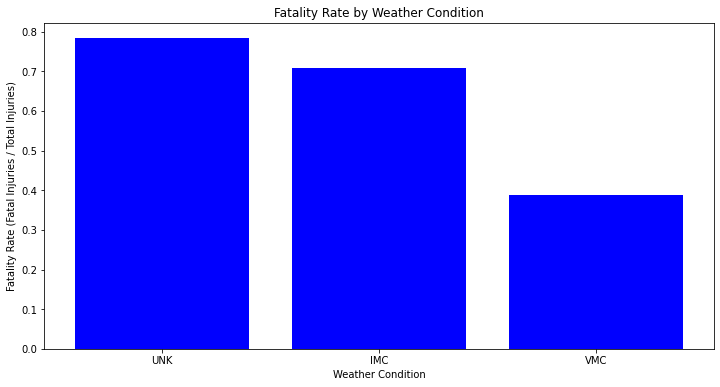

In [42]:
# Plot the distribution of injuries by weather condition
weather_injuries_sorted = weather_injuries.sort_values('Fatality_Rate', ascending=False)

plt.figure(figsize=(12,6))
plt.bar(weather_injuries_sorted.index,weather_injuries_sorted['Fatality_Rate'],color='blue')

plt.title("Fatality Rate by Weather Condition")
plt.xlabel("Weather Condition")
plt.ylabel("Fatality Rate (Fatal Injuries / Total Injuries)")
plt.show()

- - VMC has the highest number of injuries occuring while IMC has the highest fatality rates
- VMC sees the most accidents because it’s the most common flying condition, but most of these accidents are survivable, leading to a lower fatality rate.
- IMC accidents are less but more fatal.

##### SEASONS

In [43]:
# Group injuries by seasons
season_injuries = df.groupby('Season')[injury_cols].sum()

# Add total injuries
season_injuries['Total_Injuries'] = (
    season_injuries['Total.Fatal.Injuries'] +
    season_injuries['Total.Serious.Injuries'] +
    season_injuries['Total.Minor.Injuries']
)

# Compute Fatality Rate
season_injuries['Fatality_Rate'] = (season_injuries['Total.Fatal.Injuries'] / season_injuries['Total_Injuries'])

season_injuries

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Total_Injuries,Fatality_Rate
Season,,,,,,
Fall,13277.0,5038.0,6170.0,99150.0,24485.0,0.542250
Spring,10975.0,4854.0,6434.0,108616.0,22263.0,0.492970
Summer,14665.0,7368.0,10089.0,134428.0,32122.0,0.456541
Winter,11196.0,4086.0,4762.0,98863.0,20044.0,0.558571


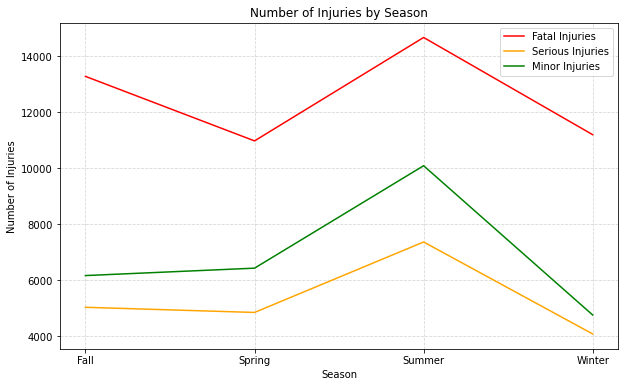

In [44]:
### Plot of each fatal, serious and minor injury by seasons
plt.figure(figsize=(10,6))

# Plot each injury type
plt.plot(season_injuries.index, season_injuries['Total.Fatal.Injuries'], label='Fatal Injuries', color='red')
plt.plot(season_injuries.index, season_injuries['Total.Serious.Injuries'], label='Serious Injuries', color='orange')
plt.plot(season_injuries.index, season_injuries['Total.Minor.Injuries'], label='Minor Injuries', color='green')

plt.title("Number of Injuries by Season")
plt.xlabel("Season")
plt.ylabel("Number of Injuries")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()

As a result of more airline activity during summer than winter:
- Summer sees more overall activity and accidents but a smaller proportion are fatal.

- Winter and Fall see fewer accidents but a larger proportion result in fatalities.

In [45]:
# Chi-Square to determine causation
from scipy.stats import chi2_contingency

# Crosstab fatality vs Engine.Type
ct = pd.crosstab(df['Is_Fatal'], df['Engine.Type'])

chi2, p, dof, expected = chi2_contingency(ct)

print(f"Chi2={chi2:.3f}, p={p:.3e}, dof={dof}")


# Null Hypothesis: There is no relationship between fatality and engine type
# If p <= 0.05: reject null hypothesis

Chi2=282.152, p=1.584e-55, dof=9


There is no significant relationship between engine type and whether an accident was fatal.
That means the chance of an accident being fatal is random. The type of engine is not associated with fatal outcomes.

In [46]:
# Crosstab fatality vs Weather.Condition
ct = pd.crosstab(df['Is_Fatal'], df['Weather.Condition'])

chi2, p, dof, expected = chi2_contingency(ct)

print(f"Chi2={chi2:.3f}, p={p:.3e}, dof={dof}")


# Null Hypothesis: There is no relationship between fatality and engine type
# If p <= 0.05: reject null hypothesis

Chi2=7339.423, p=0.000e+00, dof=2


There is a significant relationship between engine type and whether an accident was fatal.
The weather condition is associated with fatal outcomes.

In [ ]:
# Save cleaned DataFrame to a new CSV
## I will put it in .gitignore
# df.to_csv('Aviation_Data.Cleaned.csv', index=False)